<a href="https://colab.research.google.com/github/jubin-k/IPL-2008-2016/blob/main/IPL_2008_2016_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Import the Data**

In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Get Data
df_match=pd.read_csv("/content/matches.csv")
df_del=pd.read_csv("/content/deliveries.csv")

**2. Data exploration and Data cleaning**

In [ ]:
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
 df_match.shape

(636, 18)

In [ ]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df_match.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

<AxesSubplot:>

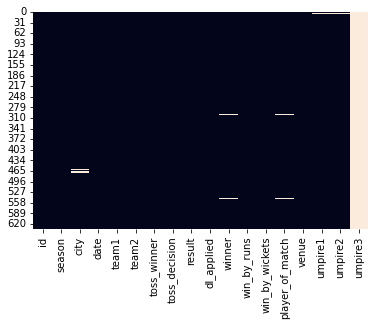

In [ ]:
sns.heatmap(df_match.isna(),cbar=False)

In [ ]:
df_match.iloc[460:480,:]
#we can see that the null values in the column 'city' are alligned with the dubai int. cricket stadium, so it can be filled with Dubai

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
467,468,2014,Sharjah,2014-04-24,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN


In [ ]:
df_match=df_match.fillna({'city':'Dubai'})

In [ ]:
#there are 3 missing values in both winner and player of match
df_match['result'].value_counts()
#we can see there is no result for the three games.we can drop these rows

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [ ]:
df_match[df_match['result']=='no result']['id']
#to drop these rows from the next dataframe using these match ids

300    301
545    546
570    571
Name: id, dtype: int64

In [ ]:
df_match.iloc[299:310,:]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
299,300,2011,Dharamsala,2011-05-21,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Deccan Chargers,82,0,S Dhawan,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
301,302,2011,Bangalore,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen,NaN
302,303,2011,Kolkata,2011-05-22,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel,NaN
303,304,2011,Mumbai,2011-05-24,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SK Raina,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN
304,305,2011,Mumbai,2011-05-25,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,MM Patel,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN
305,306,2011,Chennai,2011-05-27,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,2012,Kolkata,2012-04-05,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN


In [ ]:
df_match.dropna(subset=['winner','player_of_match'],axis=0,inplace=True)

In [ ]:
#missing value for umpire 1 and 2 is seen in same row,it can be deleted, and since there is np 3rd umpire in most of the matches , the whole column can be deleted
df_match.dropna(subset=['umpire1','umpire2'],axis=0,inplace=True)
df_match.drop(['umpire3'],axis=1,inplace=True)

In [ ]:
df_match.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
df_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
df_del.shape

(150460, 21)

In [ ]:
df_del.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_del.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

<AxesSubplot:>

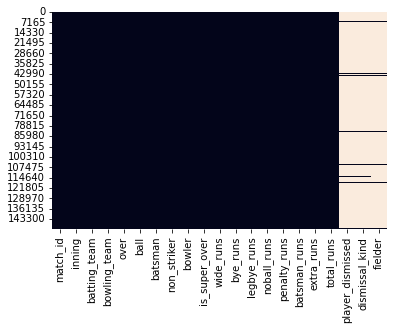

In [ ]:
sns.heatmap(df_del.isna(),cbar=False)

In [ ]:
#null values in player dismissed and dismissal kind and fielder are basically that noone was out at that point.
#so it can be replaced by zero

In [ ]:
#dropping matches with no result
to_drop1=df_del[df_del['match_id']==301].index
to_drop2=df_del[df_del['match_id']==546].index
to_drop3=df_del[df_del['match_id']==571].index

In [ ]:
df_del.drop((df_del[(df_del['match_id']==301) | (df_del['match_id']==546) | (df_del['match_id']==571)].index),axis=0,inplace=True)

In [ ]:
df_del.shape

(150139, 21)

In [ ]:
#We don't need all the columns but specific columns from both the dataframes
#from df_match we need id,season,city,team1,team2,toss_decision
#from df_del , we need total runs.

In [ ]:
df_match['team1'].unique()
df_del['bowling_team'].unique()
#Deccan charger=sunrisers hydbd
#Rising Pune Supergiant = Rising Pune Supergiants

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [ ]:
df_match['team1']=df_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team2']=df_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team1']=df_match['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_match['team2']=df_match['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_match['winner']=df_match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['winner']=df_match['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_del['batting_team']=df_del['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['batting_team']=df_del['batting_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_score = df_del.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
df_score = df_score[df_score['inning'] == 1]
df_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1270,632,1,138
1272,633,1,158
1274,634,1,162
1276,635,1,162


In [ ]:
df_match.rename(columns={'id':'match_id'},inplace=True)

In [ ]:
#this is to get the score,balls and wicket of the second team
df1 = df_match.merge(df_score[['match_id','total_runs']],on='match_id')
df1

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,184
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,183
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,163
4,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,138
628,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,158
629,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,162
630,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,162


In [ ]:
df2 = df1.merge(df_del,on='match_id')

In [ ]:
df2=df2[df2['inning']==2]
df2.iloc[:,8:]

,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,total_runs_x,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149886,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,208,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149887,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,208,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
149888,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,208,...,0,1,0,0,0,1,1,NaN,NaN,NaN
149889,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,208,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
df2['current_score'] = df2.groupby('match_id').cumsum()['total_runs_y']

In [ ]:
df2['runs_left'] = df2['total_runs_x'] - df2['current_score']

In [ ]:
df2['balls_left'] = 126 - (df2['over']*6 + df2['ball'])

In [ ]:
df2['player_dismissed'] = df2['player_dismissed'].fillna("0")
#if the value in the column is 0 , let it be and is any batsman's name,change it to 1
df2['player_dismissed'] = df2['player_dismissed'].apply(lambda x:x if x == "0" else "1")
df2['player_dismissed'] = df2['player_dismissed'].astype('int')
wickets = df2.groupby('match_id').cumsum()['player_dismissed'].values
df2['wickets'] = 10 - wickets

In [ ]:
df2['fielder'] = df2['fielder'].fillna("0")
df2['dismissal_kind'] = df2['dismissal_kind'].fillna("0")

In [ ]:
df2

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,0,0,0,1,206,119,10
126,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,1,206,118,10
127,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,1,206,117,10
128,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,0,0,0,3,204,116,10
129,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,0,0,0,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149886,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,2,0,2,0,0,0,194,14,4,4
149887,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,0,0,1,run out,NV Ojha,194,14,3,3
149888,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,0,1,1,0,0,0,195,13,2,3
149889,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,1,0,1,0,0,0,196,12,1,3


In [ ]:
#and also in dl applied, non rainy situations
df2=df2[df2['dl_applied']==0]
df2.drop(['dl_applied'],axis=1,inplace=True)

In [ ]:
df2.rename(columns={'total_runs_x':'total_runs'},inplace=True)

In [ ]:
#current run rate=current runs/overs
#cs/ball no./6
df2['crr'] = (df2['current_score']*6)/(120 - df2['balls_left'])

In [ ]:
df2['rrr'] = (df2['runs_left']*6)/df2['balls_left']

In [ ]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

In [ ]:
df2['Result'] = df2.apply(result,axis=1)

In [ ]:
df = df2[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs','crr','rrr','Result']]

In [ ]:
#shuffling the dataframe
df = df.sample(frac = 1)
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs,crr,rrr,Result
74470,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,65,17,3,165,5.825243,22.941176,0
26140,Rajasthan Royals,Mumbai Indians,Jaipur,47,22,5,145,6.000000,12.818182,1
15945,Mumbai Indians,Kings XI Punjab,Chandigarh,88,43,5,182,7.324675,12.279070,0
146560,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,106,68,9,179,8.423077,9.352941,1
133151,Rajasthan Royals,Chennai Super Kings,Chennai,15,3,2,157,7.282051,30.000000,0
...,...,...,...,...,...,...,...,...,...,...
138062,Kings XI Punjab,Rising Pune Supergiant,Chandigarh,67,55,10,152,7.846154,7.309091,1
56293,Pune Warriors,Kings XI Punjab,Mumbai,97,103,9,112,5.294118,5.650485,1
56771,Rajasthan Royals,Delhi Daredevils,Jaipur,93,80,9,151,8.700000,6.975000,1
46293,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,25,4,2,183,8.172414,37.500000,0


In [ ]:
df.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs      0
crr             0
rrr             8
Result          0
dtype: int64

In [ ]:
np.where(df['rrr'].isnull())[0]

array([ 1185, 14187, 14973, 19361, 40509, 53678, 54891, 56472])

In [ ]:
df.dropna(axis=1,inplace=True)

**3.Data visualization**

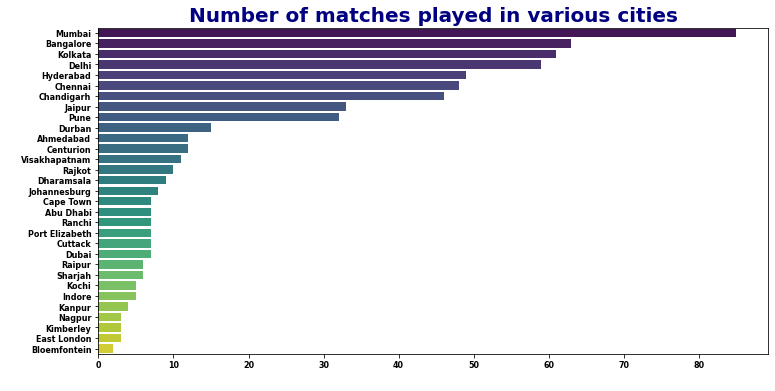

In [ ]:
plt.figure(figsize=(12,6))
city_ord=df_match['city'].value_counts().index.tolist()
sns.countplot(y=df_match['city'],palette='viridis',order=city_ord)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.yticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.show()

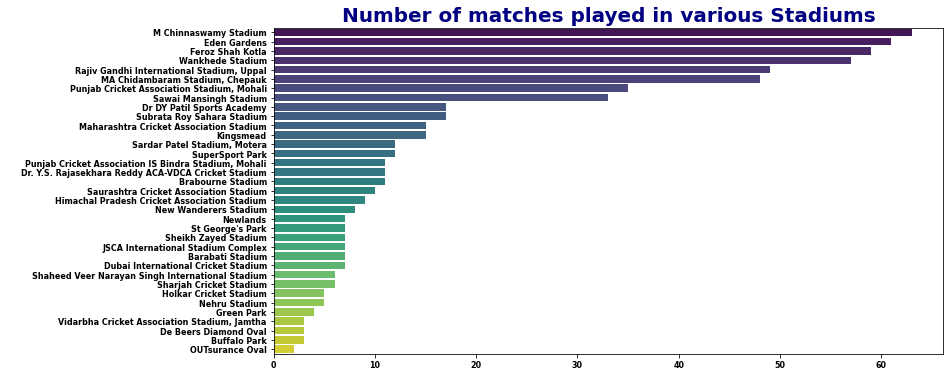

In [ ]:
plt.figure(figsize=(12,6))
city_ord=df_match['venue'].value_counts().index.tolist()
sns.countplot(y=df_match['venue'],palette='viridis',order=city_ord)
plt.title('Number of matches played in various Stadiums',fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.yticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.show()

In [ ]:
#top teams
df_match['winner'].value_counts().to_frame().rename({'winner': 'Total Wins'}, axis =1).style.background_gradient('summer_r')

,Total Wins
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,72
Sunrisers Hyderabad,71
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Rising Pune Supergiant,15
Gujarat Lions,13


In [ ]:
#top 10 players
df_match['player_of_match'].value_counts().head(10).to_frame().rename({'player_of_match':'Man of the match'},axis=1).style.background_gradient('summer_r') 

,Man of the match
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
G Gambhir,13
MS Dhoni,13
MEK Hussey,12
AM Rahane,12


In [ ]:
#Highest chasing score
high=df1['total_runs'].value_counts().index.sort_values(ascending=False).tolist()[:11]
high

[263, 248, 246, 240, 235, 232, 231, 230, 227, 226, 223]

In [ ]:
tm=[]
for i in high:
  k=df1[df1['total_runs']==i]['winner'].values[0]
  tm.append(k)
tm

['Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Chennai Super Kings']

In [ ]:
high_score=pd.DataFrame({'Team':tm,'High Score':high})
high_score.style.background_gradient('summer_r')

,Team,High Score
0,Royal Challengers Bangalore,263
1,Royal Challengers Bangalore,248
2,Chennai Super Kings,246
3,Chennai Super Kings,240
4,Royal Challengers Bangalore,235
5,Kings XI Punjab,232
6,Delhi Daredevils,231
7,Kings XI Punjab,230
8,Royal Challengers Bangalore,227
9,Kings XI Punjab,226


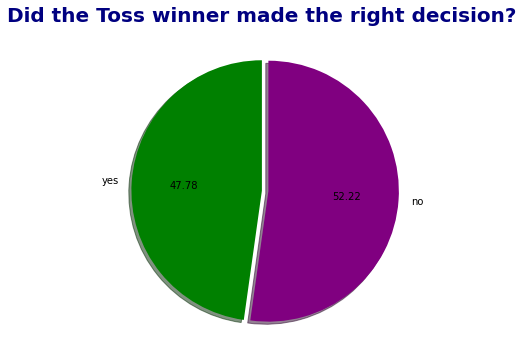

In [ ]:
plt.figure(figsize = (12,6))
toss_win=df_match[df_match['toss_winner'] == df_match['winner']]
toss_lose=df_match[df_match['toss_winner'] != df_match['winner']]
slices=[len(toss_win),len(toss_lose)]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%.2f',colors=['green','purple'])
plt.title('Did the Toss winner made the right decision?',fontweight='bold',fontsize=20,color='navy')
fig = plt.gcf()
plt.show()

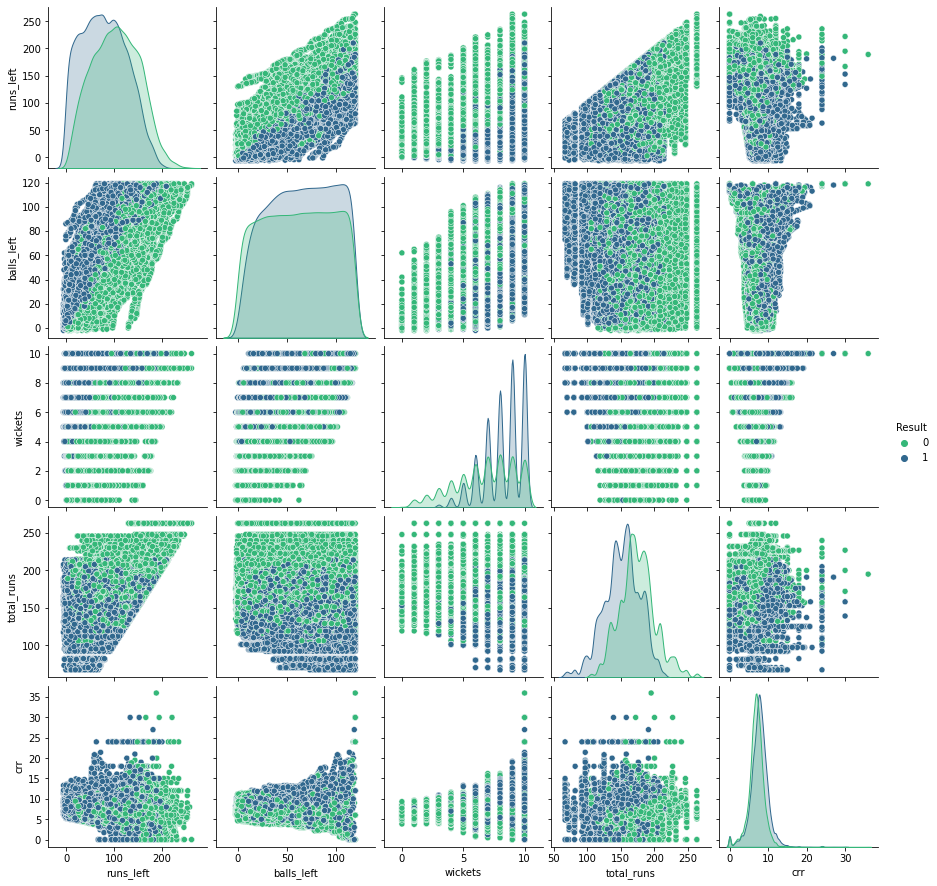

In [ ]:
sns.pairplot(df,hue='Result',palette='viridis_r') 
#since there is a lot of overlapping happening here,while choosing an algorithm,it is best to go with KNN,DT or RF(non-linear)

**4.Creating ML model**

In [ ]:
df['Result'].value_counts()
#not an imbalanced dataset

1    37483
0    33756
Name: Result, dtype: int64

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,runs_left,balls_left,wickets,total_runs,crr,Result,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kochi Tuskers Kerala,...,city_Kolkata,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Rajkot,city_Ranchi,city_Sharjah,city_Visakhapatnam
74470,65,17,3,165,5.825243,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26140,47,22,5,145,6.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15945,88,43,5,182,7.324675,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146560,106,68,9,179,8.423077,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133151,15,3,2,157,7.282051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138062,67,55,10,152,7.846154,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
56293,97,103,9,112,5.294118,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
56771,93,80,9,151,8.700000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46293,25,4,2,183,8.172414,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=df.drop(['Result'],axis=1)
y=df['Result']
x
y

74470     0
26140     1
15945     0
146560    1
133151    0
         ..
138062    1
56293     1
56771     1
46293     0
98308     1
Name: Result, Length: 71239, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train
x_test
y_train
y_test

29273     1
37439     1
67957     1
12940     0
69712     0
         ..
38951     1
14041     0
65373     0
63194     0
124033    0
Name: Result, Length: 14248, dtype: int64

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x_train.iloc[:,:5])
x_train.iloc[:,:5]=sc.transform(x_train.iloc[:,:5])
x_test.iloc[:,:5]=sc.transform(x_test.iloc[:,:5])

In [ ]:
x_train
x_test.iloc[:,18:]

,bowling_team_Kings XI Punjab,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiant,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,city_Ahmedabad,...,city_Kolkata,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Rajkot,city_Ranchi,city_Sharjah,city_Visakhapatnam
29273,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67957,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12940,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
69712,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65373,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
63194,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=9)
svm=SVC()
nb=BernoulliNB()
tree=DecisionTreeClassifier()
random=RandomForestClassifier()
models=[lr,knn,svm,nb,tree,random]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  report=classification_report(y_pred,y_test)
  matrix=confusion_matrix(y_pred,y_test)
  print(i, score)
  print(report)
  print(matrix)
  print('*'*100)

LogisticRegression() 0.8185710275126333
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6778
           1       0.83      0.83      0.83      7470

    accuracy                           0.82     14248
   macro avg       0.82      0.82      0.82     14248
weighted avg       0.82      0.82      0.82     14248

[[5475 1303]
 [1282 6188]]
****************************************************************************************************
KNeighborsClassifier(n_neighbors=9) 0.9950870297585626
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6743
           1       1.00      0.99      1.00      7505

    accuracy                           1.00     14248
   macro avg       1.00      1.00      1.00     14248
weighted avg       1.00      1.00      1.00     14248

[[6715   28]
 [  42 7463]]
************************************************************************************************

we'll go with Random forest model which has the lowest FN and FPs!